In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Scikit learn - machine learning algorithms and methods
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [8]:
new_data = pd.read_csv("cancer.csv")

# Create features/inputs
X = new_data.drop(columns = ["Survival "])

# Create the output/class
y = new_data["Survival "]

# Splitting into training and testing datasets using KFold of 10 folds
kf = KFold()
KFold(n_splits=10)

for train_index, test_index in kf.split(new_data):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
new_data   

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [9]:
def clf(X_train, X_test, y_train, y_test):
    # Defining and training the model
    clf = LogisticRegression(solver = "newton-cg", penalty = "none", C = 100, random_state = 10).fit(X_train, y_train)

    # Evaluating the model 
    clf.score(X_test, y_test)

    # Making predictions
    clf_pred = clf.predict(X_test)

    return clf, clf_pred


In [10]:
def rf(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)
    rf.score(X_test, y_test)
    # Making predictions
    rf_pred = rf.predict(X_test)

    return rf, rf_pred

In [26]:
def svm(X_train, X_test, y_train, y_test):
    svm = SVC(random_state = 0, kernel = "rbf", gamma = 100, C=0.1).fit(X_train, y_train)
    svm.score(X_test, y_test)
    svm_pred = svm.predict(X_test)
    
    return svm, svm_pred

In [27]:
def nn(X_train, X_test, y_train, y_test):
    nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)
    nn.score(X_test, y_test)
    nn_pred = nn.predict(X_test)
    
    return nn, nn_pred

In [28]:
def machine_learning(data, algorithm):
    
    algo_res, pred = algorithm(X_train, X_test, y_train, y_test)
    
    
    # Developing the confusion matrix
    cm = confusion_matrix(y_test, pred, labels = algo_res.classes_)
    # Display Confusion Matrix
    print("          " + "Confusion Matrix for", algorithm.__name__)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Under", "Over"])
    disp.plot()
    # Display ROC Curve
    plot_roc_curve(algo_res, X_test, y_test)
    plt.title('ROC Curve for {}'.format(algorithm.__name__))
    plt.show()

    return classification_report(y_test, pred)

          Confusion Matrix for clf


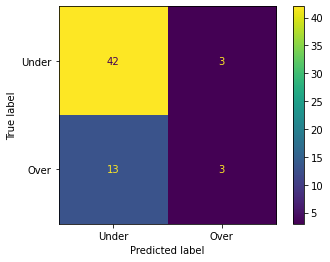

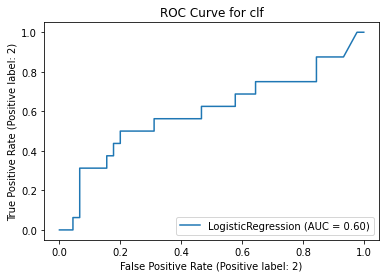

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        45
           2       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61



In [29]:
print(machine_learning(new_data, clf))

          Confusion Matrix for rf


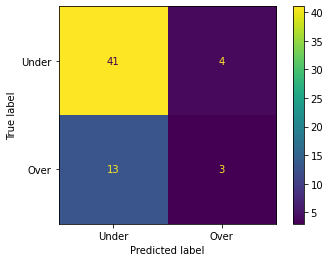

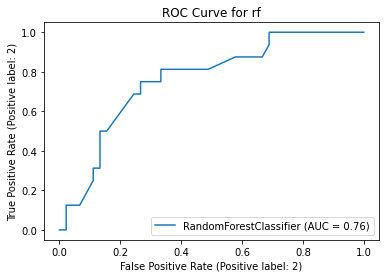

              precision    recall  f1-score   support

           1       0.76      0.91      0.83        45
           2       0.43      0.19      0.26        16

    accuracy                           0.72        61
   macro avg       0.59      0.55      0.54        61
weighted avg       0.67      0.72      0.68        61



In [30]:
print(machine_learning(new_data, rf))

          Confusion Matrix for svm


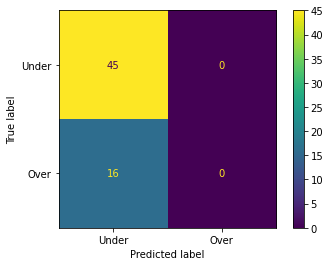

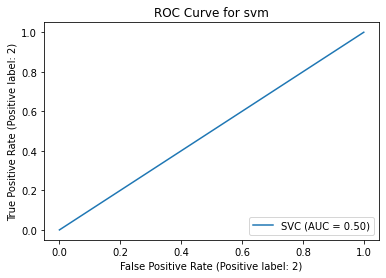

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        45
           2       0.00      0.00      0.00        16

    accuracy                           0.74        61
   macro avg       0.37      0.50      0.42        61
weighted avg       0.54      0.74      0.63        61



In [31]:
print(machine_learning(new_data, svm))

          Confusion Matrix for nn


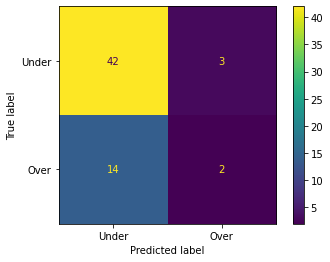

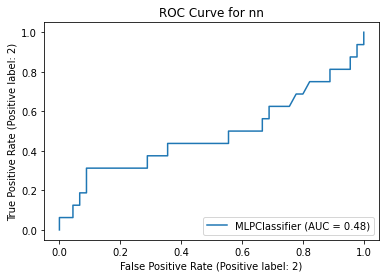

              precision    recall  f1-score   support

           1       0.75      0.93      0.83        45
           2       0.40      0.12      0.19        16

    accuracy                           0.72        61
   macro avg       0.57      0.53      0.51        61
weighted avg       0.66      0.72      0.66        61



In [32]:
print(machine_learning(new_data, nn))